# 911 Calls - Capstone Project

For this capstone project we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)


In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('911.csv')

df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 44.2 MB


In [3]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## Questions
___

<big>1. What are the top 10 <code>zip codes</code> with <b>highest</b> number of 911 calls?</big>

In [4]:
df['zip'].value_counts().head(10)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
19002.0    3050
19468.0    2990
19454.0    2781
19090.0    2635
19038.0    2578
Name: zip, dtype: int64

<big>2. What are the top 10 <code>townships (twp)</code> with <b>highest</b> number of 911 calls?</big>

In [5]:
df['twp'].value_counts().head(10)

LOWER MERION        8443
ABINGTON            5977
NORRISTOWN          5890
UPPER MERION        5227
CHELTENHAM          4575
POTTSTOWN           4146
UPPER MORELAND      3434
LOWER PROVIDENCE    3225
PLYMOUTH            3158
HORSHAM             3003
Name: twp, dtype: int64

<big>3. How many unique codes are there in the <code>title</code> column?</big>

In [6]:
df['title'].nunique()

110

<big>4. Address (<code>addr</code>) with the most 911 calls?</big>

In [7]:
print(df['addr'].value_counts().idxmax(), df['addr'].value_counts().max(), sep=" : ")

SHANNONDELL DR & SHANNONDELL BLVD : 938


<big>5. What are the top 5 most reported emergencies (<code>title</code> column)?</big>

In [8]:
df['title'].value_counts().head()

Traffic: VEHICLE ACCIDENT -    23066
Traffic: DISABLED VEHICLE -     7702
Fire: FIRE ALARM                5496
EMS: RESPIRATORY EMERGENCY      5112
EMS: CARDIAC EMERGENCY          5012
Name: title, dtype: int64

<big>6. What are the top 5 <code>townships (twp)</code> with most reported <b>'Traffic: VEHICLE ACCIDENT -'</b> emergency?</big>

In [9]:
filter_ = df['title'] == 'Traffic: VEHICLE ACCIDENT -'

df[filter_]['twp'].value_counts().head()

LOWER MERION    2324
UPPER MERION    1712
ABINGTON        1338
CHELTENHAM      1210
PLYMOUTH         951
Name: twp, dtype: int64

<big>7. What are the top 5 townships (<code>twp</code>) reporting the most number of '<b>EMS: RESPIRATORY</b>' emergecy in 2020?<br>(potential COVID contamination)</big>

In [10]:
filter_1 = df['timeStamp'].apply(lambda x : x.startswith('2020'))

filter_2 = df['title'] == 'EMS: RESPIRATORY EMERGENCY'

df[filter_1 & filter_2]['twp'].value_counts().head()

Series([], Name: twp, dtype: int64)

### Creating New Column - <code>reason</code>

In [11]:
df['reason'] = df['title'].apply(lambda x : x.split(':')[0])

df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


<big>8. What are the top 5 most reported <b>EMS</b> emergencies (<code>title</code> column)?</big>

In [12]:
df[df['reason'] == 'EMS']['title'].value_counts().head()

EMS: RESPIRATORY EMERGENCY    5112
EMS: CARDIAC EMERGENCY        5012
EMS: FALL VICTIM              4863
EMS: VEHICLE ACCIDENT         3935
EMS: SUBJECT IN PAIN          2687
Name: title, dtype: int64

<big>9. Which areas (<code>addr</code>) reported the most '<b>Fire</b>' incidents on 911?</big>

In [13]:
df[df['reason'] == 'Fire']['addr'].value_counts().head(6)

MORELAND RD & EASTON RD          51
GERMANTOWN PIKE & LAUNFALL RD    37
KING ST & PENN ST                34
DEKALB PIKE & COLONIAL DR        32
HIGH ST & S FRANKLIN ST          30
OLD YORK RD & YORK RD            30
Name: addr, dtype: int64

<big>10. What is the most common <b>reason</b> for 911 calls?</big>

In [14]:
df['reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: reason, dtype: int64

## Data Visualization
___

In [15]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('seaborn')

In [16]:
import seaborn as sns

sns.set_theme()

sns.set_context('talk')


<AxesSubplot:xlabel='reason', ylabel='count'>

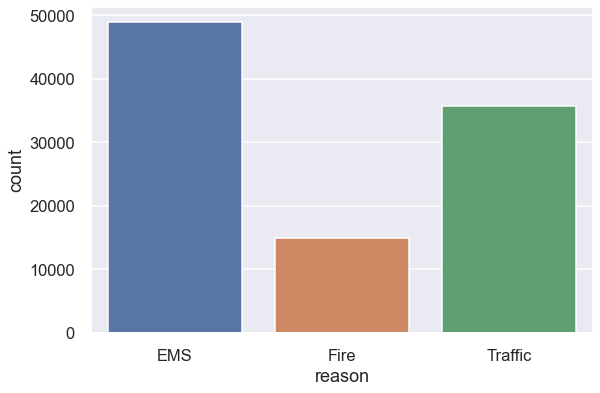

In [17]:
plt.figure(figsize=(9,6))

sns.countplot(data=df, x='reason')

In [18]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)

import cufflinks as cfl

cfl.go_offline()

In [19]:
df['reason'].value_counts().iplot(kind='bar',title='Call Count by Reason')

### Time Information

In [20]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


In [21]:
type(df['timeStamp'].iloc[0])

str

In [22]:
# Converting to Datetime

df['timeStamp'] = pd.to_datetime(df['timeStamp'])

type(df['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

### Creating New Columns - <code>Month</code>, <code>Day of Week</code>, <code>Hour</code>

In [23]:
day_map = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}


df['month'] = df['timeStamp'].apply(lambda x: x.month)
df['day_of_week'] = df['timeStamp'].apply(lambda x: x.dayofweek)
df['hour'] = df['timeStamp'].apply(lambda x: x.hour)

df['day_of_week'] = df['day_of_week'].map(day_map)

df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,month,day_of_week,hour
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,12,Thu,17
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,12,Thu,17
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,12,Thu,17
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,12,Thu,17
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,12,Thu,17


### Analyzing Calls by Day of Week

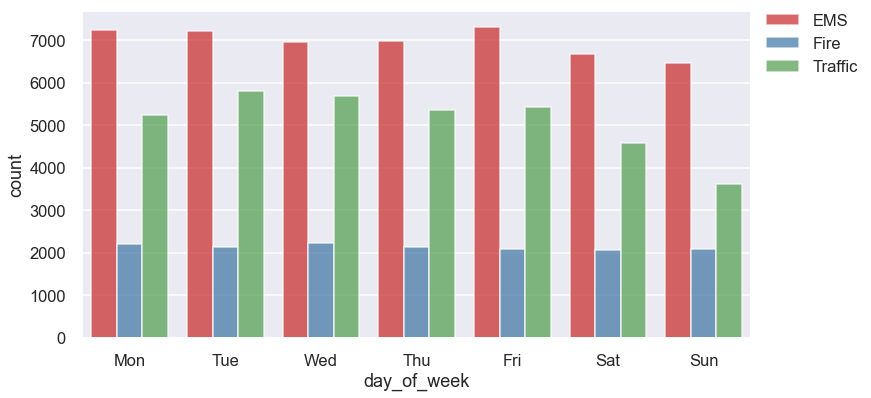

In [24]:
plt.figure(figsize=(12, 6))

sns.countplot(data=df, x='day_of_week', hue='reason',
              palette='Set1', alpha=0.75, order=day_map.values()
             ).legend(loc='center left',bbox_to_anchor=(1.0, 0.9))


In [25]:
# Grouping DataFrame over 'day_of_week' and 'reason'
calls_by_day_of_week = df.groupby(['day_of_week', 'reason'])[['e']].count()

# Re-ordering Index of the Data Set
calls_by_day_of_week = calls_by_day_of_week.reindex(day_map.values(), level=0)

calls_by_day_of_week.head()

e
day_of_week reason       
Mon         EMS      7240
            Fire     2204
            Traffic  5236
Tue         EMS      7222
            Fire     2121

In [26]:
plt.style.use('ggplot')
sns.set_context('talk')


Text(0.5, 1.0, 'Total Call Count by Day of Week')

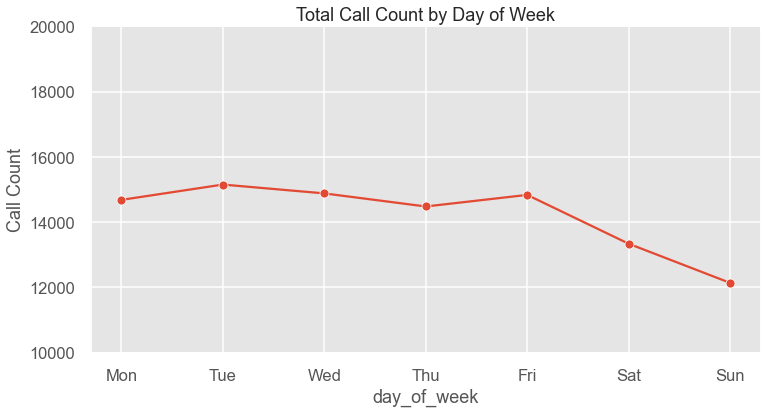

In [27]:
plt.figure(figsize=(12,6))

sns.lineplot(data=calls_by_day_of_week, x='day_of_week', y='e',
             marker='o', estimator=sum, ci=None)

plt.ylabel('Call Count')
plt.ylim((10000,20000))
plt.title("Total Call Count by Day of Week")

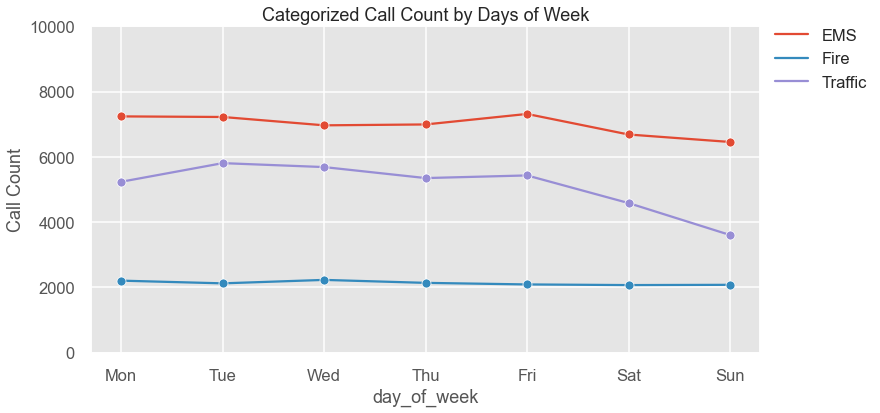

In [28]:
plt.figure(figsize=(12,6))

sns.lineplot(data=calls_by_day_of_week, x='day_of_week', y='e',
             hue='reason', marker='o')

plt.ylabel('Call Count')
plt.ylim((0,10000))
plt.title("Categorized Call Count by Days of Week")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.9))

### Analyzing Calls by Month

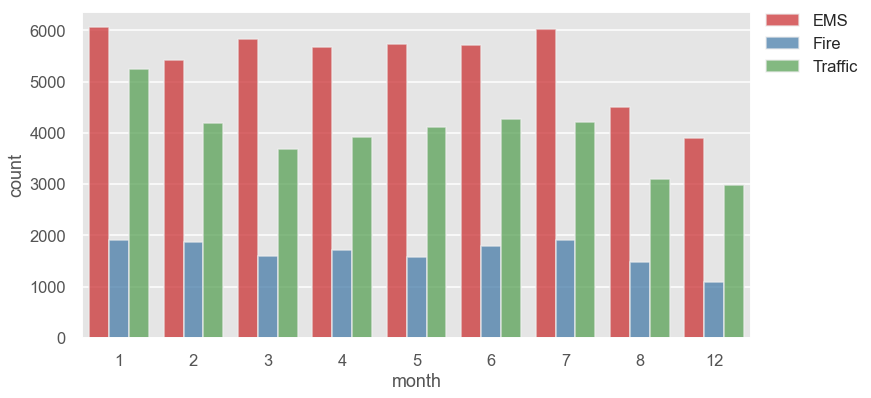

In [29]:
plt.figure(figsize=(12, 6))

sns.countplot(data=df, x='month', hue='reason',
              palette='Set1', alpha=0.75)

plt.legend(loc='center left',bbox_to_anchor=(1.0, 0.9))


In [30]:
# Grouping DataFrame over 'day_of_week' and 'reason'
calls_by_month = df.groupby(['month', 'reason'])[['e']].sum()

calls_by_month.head()

e
month reason       
1     EMS      6063
      Fire     1905
      Traffic  5237
2     EMS      5413
      Fire     1869

Text(0.5, 1.0, 'Total Call Count by Month')

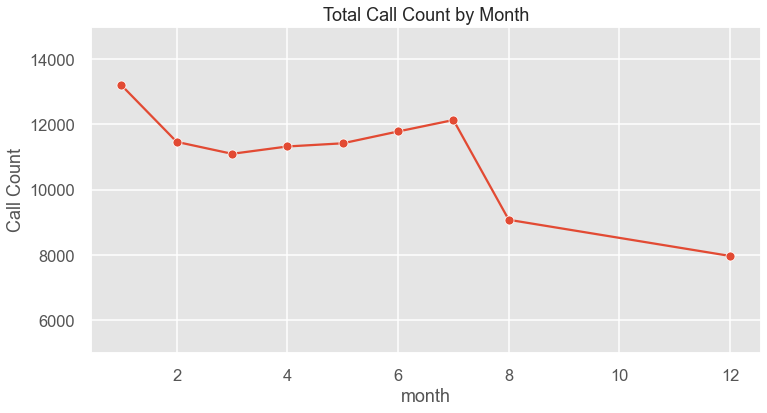

In [31]:
plt.figure(figsize=(12,6))

sns.lineplot(data=calls_by_month, x='month', y='e',
             marker='o', estimator=sum, ci=None)

plt.ylabel('Call Count')
plt.ylim((5000,15000))
plt.title("Total Call Count by Month")

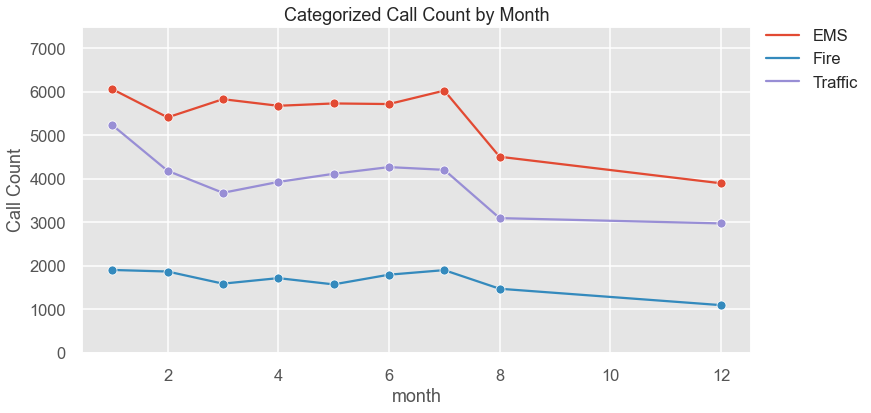

In [32]:
plt.figure(figsize=(12,6))

sns.lineplot(data=calls_by_month, x='month', y='e',
             hue='reason', marker='o')

plt.ylabel('Call Count')
plt.ylim((0,7500))
plt.title("Categorized Call Count by Month")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.9))

In [33]:
from matplotlib.ticker import MultipleLocator

plt.style.use('seaborn')
sns.set_context('talk', font_scale=0.8)

(6000.0, 15000.0)

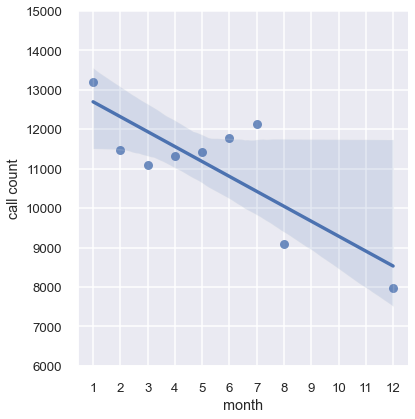

In [34]:
g = sns.lmplot(data=calls_by_month.groupby('month').sum().reset_index(),        # RESET_INDEX
               x='month', y='e', height=6, aspect=1)

g.axes[0][0].xaxis.set_major_locator(MultipleLocator(1))

g.set_ylabels('call count')

plt.ylim((6000, 15000))

### Creating New Column - <code>date</code>

In [35]:
df['date'] = df['timeStamp'].apply(lambda x : x.date())

df[['date']].head()

,date
0,2015-12-10
1,2015-12-10
2,2015-12-10
3,2015-12-10
4,2015-12-10


### Analyzing calls by Date

In [36]:
calls_by_date = df.groupby(['date', 'reason']).count()[['e']]

calls_by_date.head()

e
date       reason      
2015-12-10 EMS       57
           Fire      15
           Traffic   43
2015-12-11 EMS      186
           Fire      69

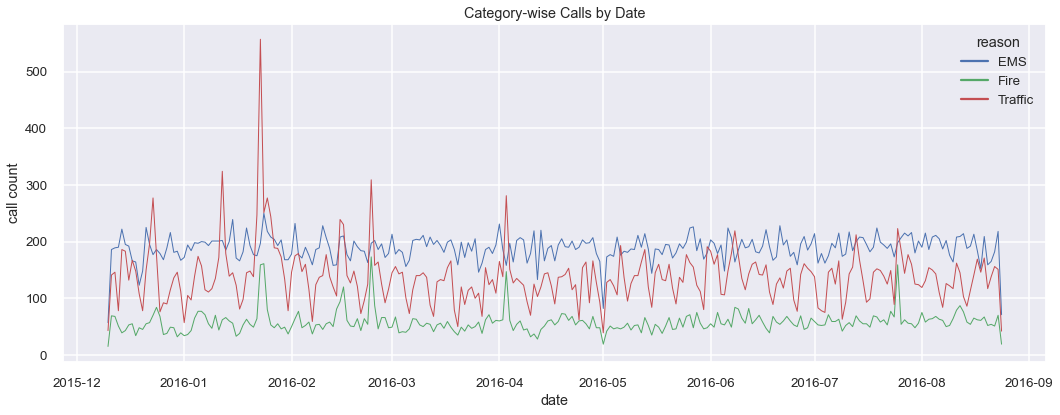

In [37]:
plt.figure(figsize=(15, 6))
sns.lineplot(data=calls_by_date, x='date', y='e', hue='reason', lw=1)
plt.title('Category-wise Calls by Date')
plt.ylabel('call count')
plt.tight_layout()

In [38]:
calls_by_date.groupby('date').sum().iplot(kind='line', title='Total Calls')


In [39]:
calls_by_date.unstack('reason').iplot(kind='line', title='Calls by Category')

In [40]:
df[df['reason']=='EMS'].groupby('date').count()['e'].iplot(kind='line', title='EMS Calls')

In [41]:
df[df['reason']=='Traffic'].groupby('date').count()['e'].iplot(kind='line', title='Traffic Calls')

In [42]:
df[df['reason']=='Fire'].groupby('date').count()['e'].iplot(kind='line', title='Fire Calls')

### Analyzing Calls by Hour

In [43]:
# Grouping Data
calls_by_hour = df.groupby(['day_of_week', 'hour']).count().reset_index()

# Creating Matrix from DataFrame using PIVOT
calls_by_hour = calls_by_hour.pivot(index='day_of_week', columns='hour', values='e')

# Re-Ordering Index
calls_by_hour = calls_by_hour.reindex(day_map.values())

calls_by_hour

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day_of_week,,,,,,,,,,,,,,,,,,,,,
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Tue,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Wed,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330


<AxesSubplot:xlabel='hour', ylabel='day_of_week'>

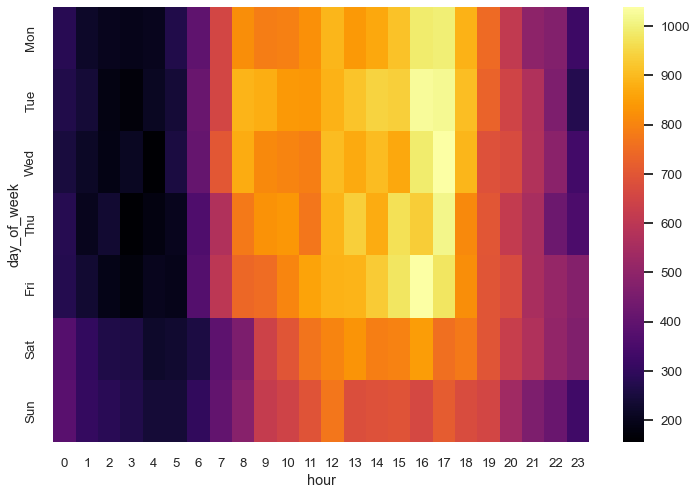

In [44]:
plt.figure(figsize=(12,8))
sns.heatmap(calls_by_hour, cmap='inferno')


In [45]:
# Alternate method for Matrix creation - UNSTACK()

by_hour = df.groupby(['day_of_week', 'hour']).count()['e'].unstack('hour')

by_hour = by_hour.reindex(day_map.values())

by_hour

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day_of_week,,,,,,,,,,,,,,,,,,,,,
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Tue,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Wed,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330


<Figure size 864x576 with 0 Axes>

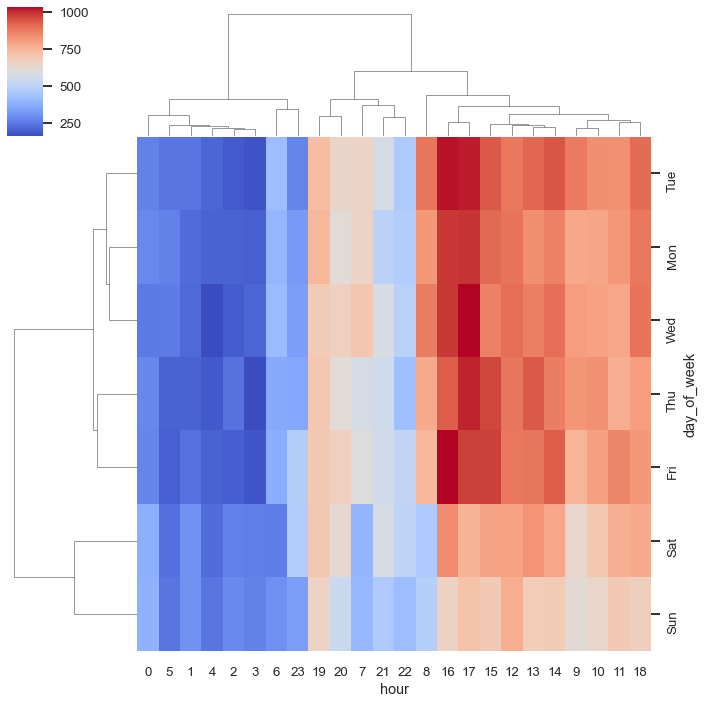

In [46]:
plt.figure(figsize=(12,8))
sns.clustermap(by_hour, cmap='coolwarm')


## Thank You.